In [1]:
import os
import matplotlib.pyplot as plt
os.chdir("/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources")
from functions import *
import pandas as pd

# a.
ANSWER -> There is a very recognizable pattern that gets bigger so the max number visitors increases with each season

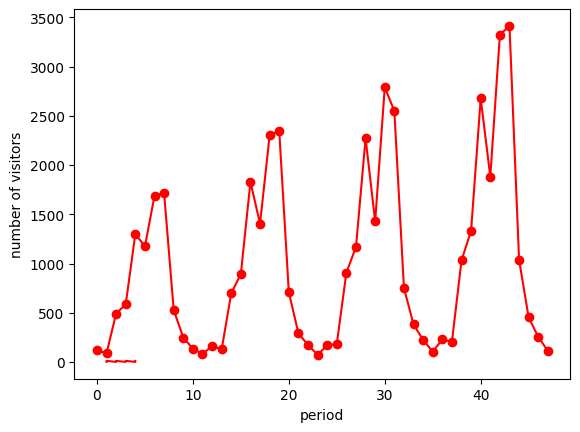

In [2]:
visitors = pd.read_csv("amusement park.csv", delimiter=';')

plt.figure()
plt.plot(visitors.year, visitors.month, visitors['number of visitors'], 'o-', color='red')
plt.xlabel('period')
plt.ylabel('number of visitors')
plt.show()

# b
ANSWER -> I would use the additive model

# c
ASNWER -> 12

<Figure size 640x480 with 0 Axes>

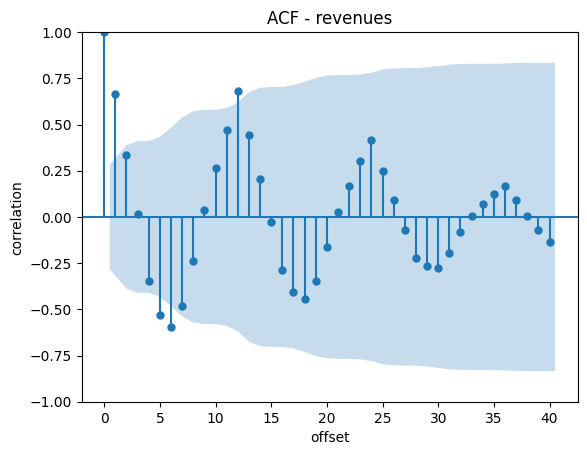

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure()
plot_acf(np.array(visitors['number of visitors']).astype(float), lags=40)
plt.xlabel('offset')
plt.ylabel('correlation')
plt.title('ACF - revenues')
plt.show()
plt.show()

# d. Now do a decomposition. Plot this in a diagram.

<Figure size 640x480 with 0 Axes>

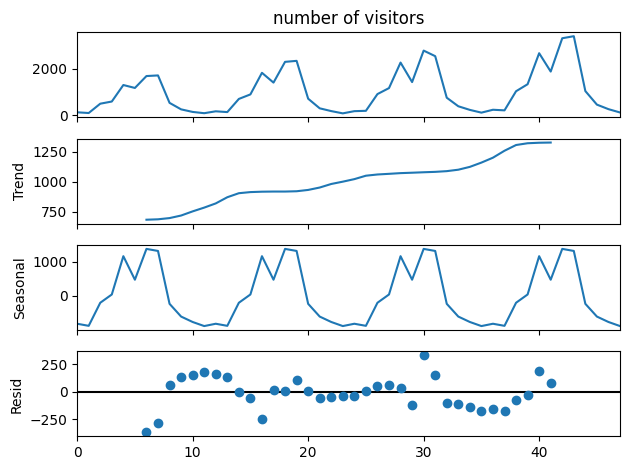

In [4]:
import statsmodels.api as sm
data = visitors

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data['number of visitors'], period=12)

# Plot the decomposition components
plt.figure()
decomposition.plot('o-')
plt.show()


# e. We are now going to make a model to make predictions for the future. Do a linear regression on the trend and determine the slope and intercept. Which equation do you find for the trend?

In [12]:
print(seasonalDecompositionPredict(visitors['number of visitors'],12,'multiplicative', 48))

127.45091479008057


# f. Calculate the values of the trend -use the equation you found in e.- for the coming year. Whichvalues do you come up with?

In [10]:
display(trend)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 681.375,
 684.8333333333333,
 695.0833333333333,
 716.5,
 751.3333333333334,
 782.9583333333334,
 818.1666666666667,
 870.0,
 903.75,
 913.125,
 916.5,
 917.7083333333333,
 917.6666666666666,
 920.2083333333333,
 931.25,
 951.375,
 981.2083333333333,
 1000.625,
 1021.875,
 1050.625,
 1060.875,
 1066.375,
 1072.25,
 1075.7083333333335,
 1079.5416666666665,
 1082.9166666666665,
 1088.875,
 1100.9583333333335,
 1124.7916666666667,
 1160.625,
 1201.8333333333333,
 1260.0833333333333,
 1308.0416666666665,
 1322.9583333333335,
 1327.25,
 1328.875,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

# g. What are the values of the seasonal trend

In [ ]:
# Repeat the seasonal pattern for the next 12 months
next_year_seasonal = np.tile(decomposition.seasonal[:12], 1)

print("Seasonal Trend Values for the Next Year:")
print(next_year_seasonal)

# h. Now multiply the trend values by the pattern. You now have an estimate of the number of visitors for the next year. Which values do you arrive at (round the values to an integer)?

In [ ]:
# Estimate the number of visitors for the next year
estimated_visitors = np.round(predicted_trend.flatten() * next_year_seasonal)

print("Estimated Number of Visitors for the Next Year:")
print(estimated_visitors.astype(int))


# i. What is the MAE, RMSE and MAPE? What is the meaning of the MAPE?

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_visitors = data['number of visitors']

# Calculate MAE
mae = mean_absolute_error(actual_visitors, estimated_visitors)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_visitors, estimated_visitors))

# Calculate MAPE
mape = np.mean(np.abs((actual_visitors - estimated_visitors) / actual_visitors)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
